# **1.- Determinación de variables clínicas y biomédicas más relevantes**

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [161]:
# Cargar el dataset
file_path = '../data/processed/df_cancer_prostata_processed.csv'
df = pd.read_csv(file_path)


In [162]:
# Mostrar las primeras filas y un resumen de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RELIGION1                            2644 non-null   object 
 1   ETNIA                                2644 non-null   object 
 2   ZONA_VIVIENDA                        2644 non-null   object 
 3   COMUNA                               2644 non-null   object 
 4   REGION                               2644 non-null   object 
 5   SSREFERENCIA                         2644 non-null   object 
 6   RECINTO_PROCEDE                      2644 non-null   object 
 7   ESTABLE_DESTINO                      2644 non-null   object 
 8   ACT_LABORAL                          2644 non-null   object 
 9   ACT_EMPRESA                          2644 non-null   object 
 10  SITUACION_LABORAL                    2644 non-null   object 
 11  ULT_CURSO_APROBADO            

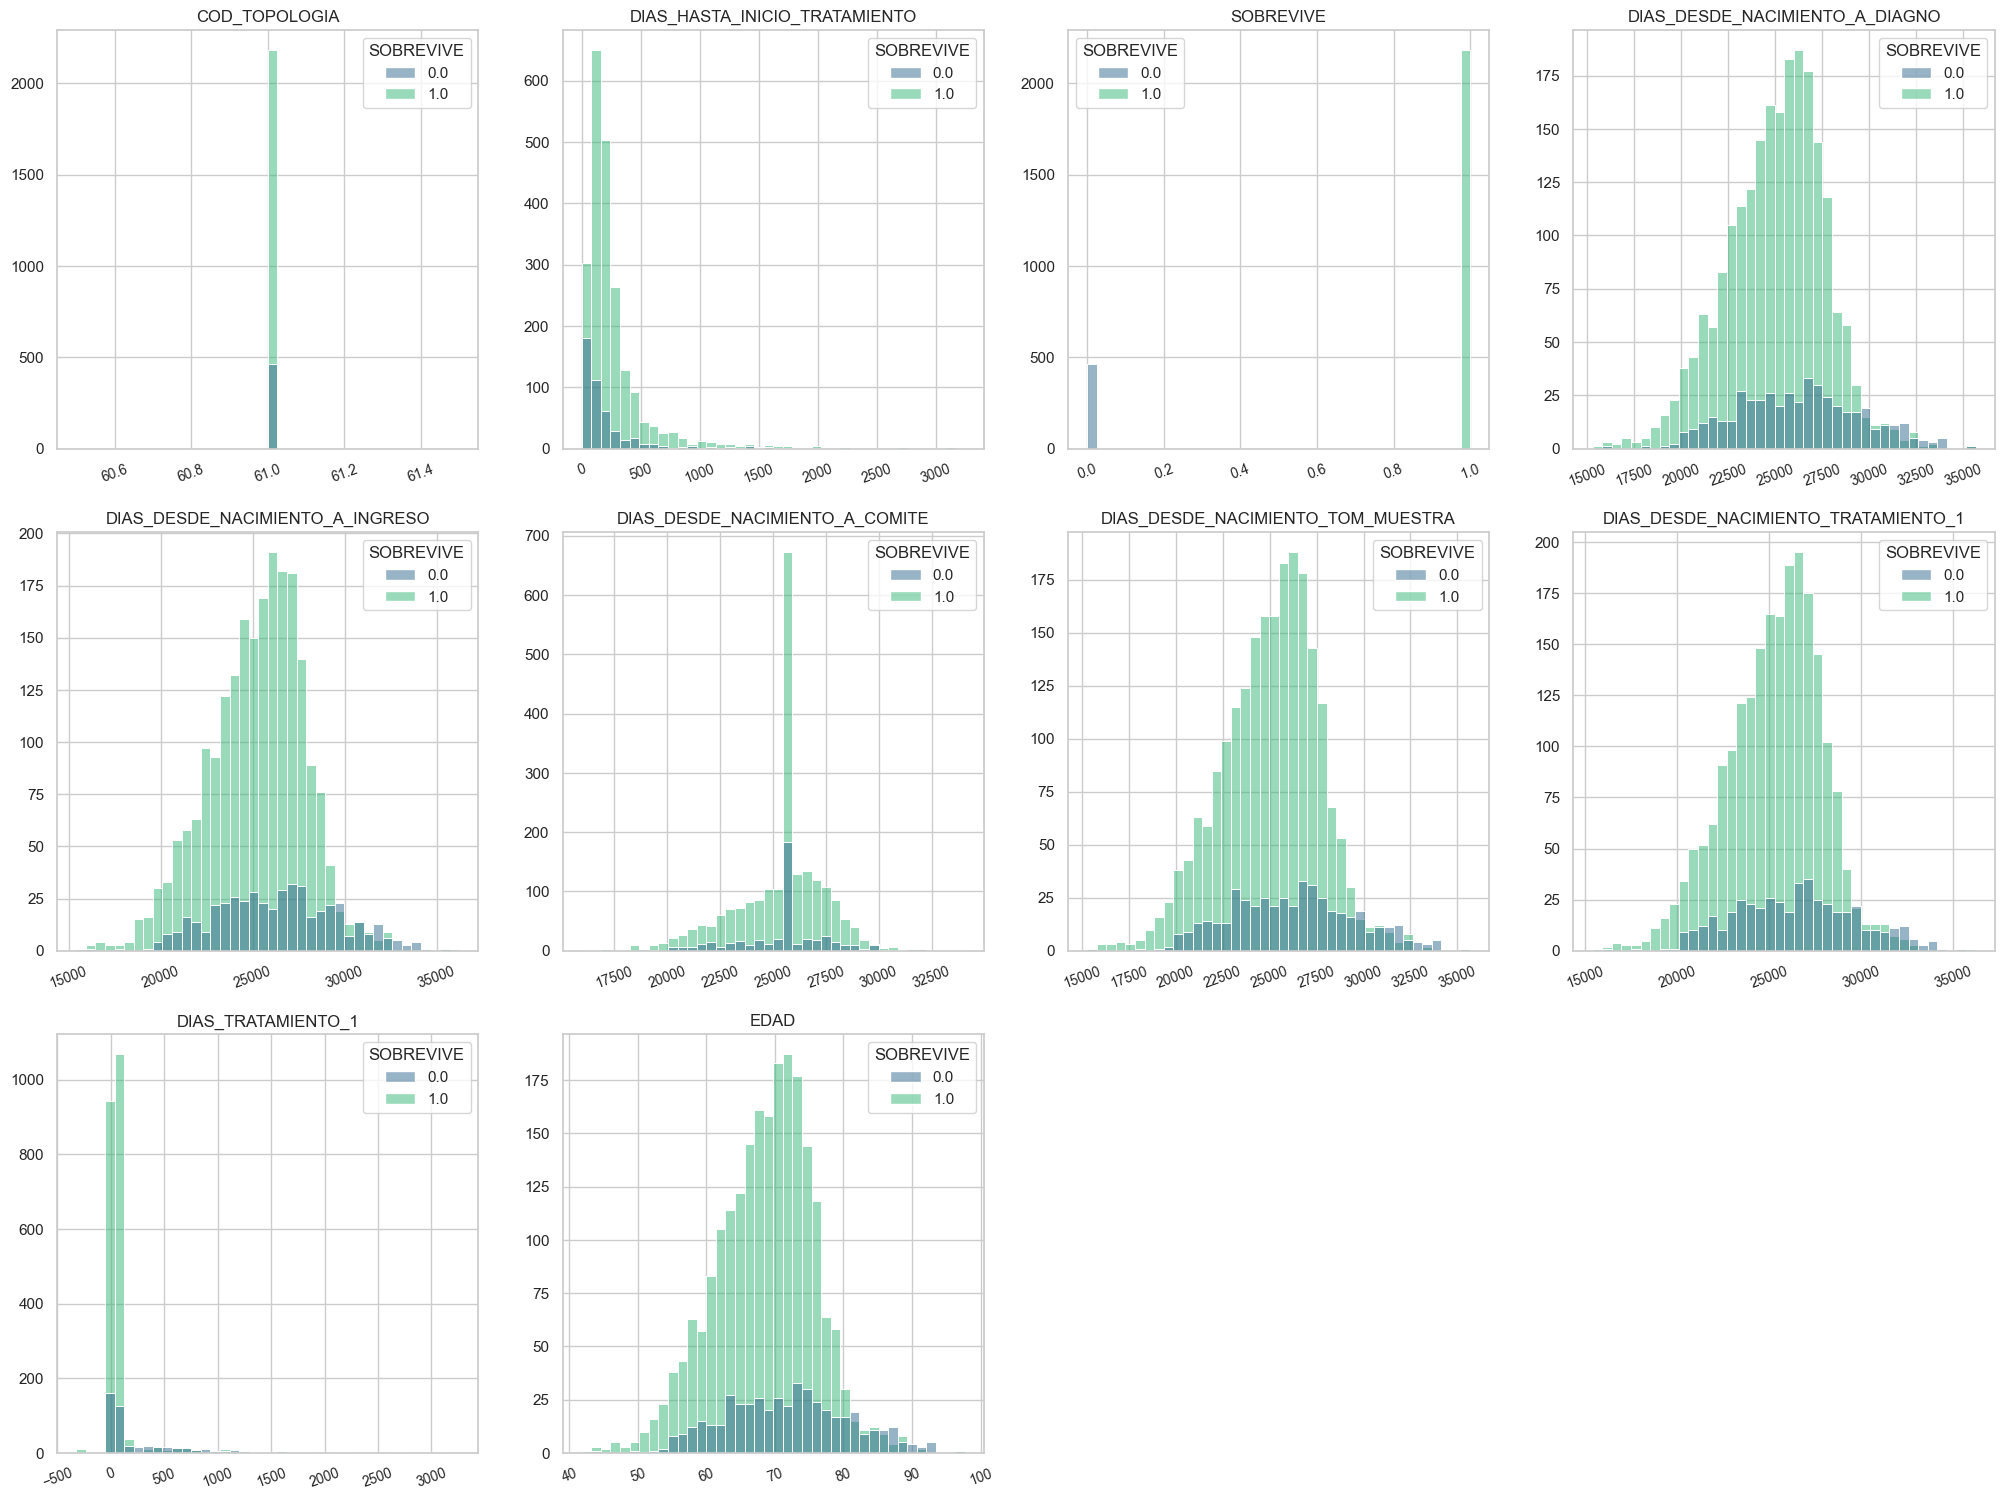

In [163]:


# Seleccionar las columnas deseadas
#columnas_deseadas = ['COD_TOPOLOGIA','DIAS_HASTA_INICIO_TRATAMIENTO','EDAD']
# Identificar columnas numéricas
columnas_deseadas = df.select_dtypes(include=['float64', 'int64']).columns

df_nuevo = df[columnas_deseadas]
fig = plt.figure(figsize = (25, 25))

i = 1
for n in df_nuevo.columns:
    plt.subplot(4, 4, i)
    ax = sns.histplot(x = df[n], hue = df['SOBREVIVE'], palette = "viridis", bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

In [164]:
# Seleccionar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
len(columnas_categoricas)

50

<Figure size 2500x2500 with 0 Axes>

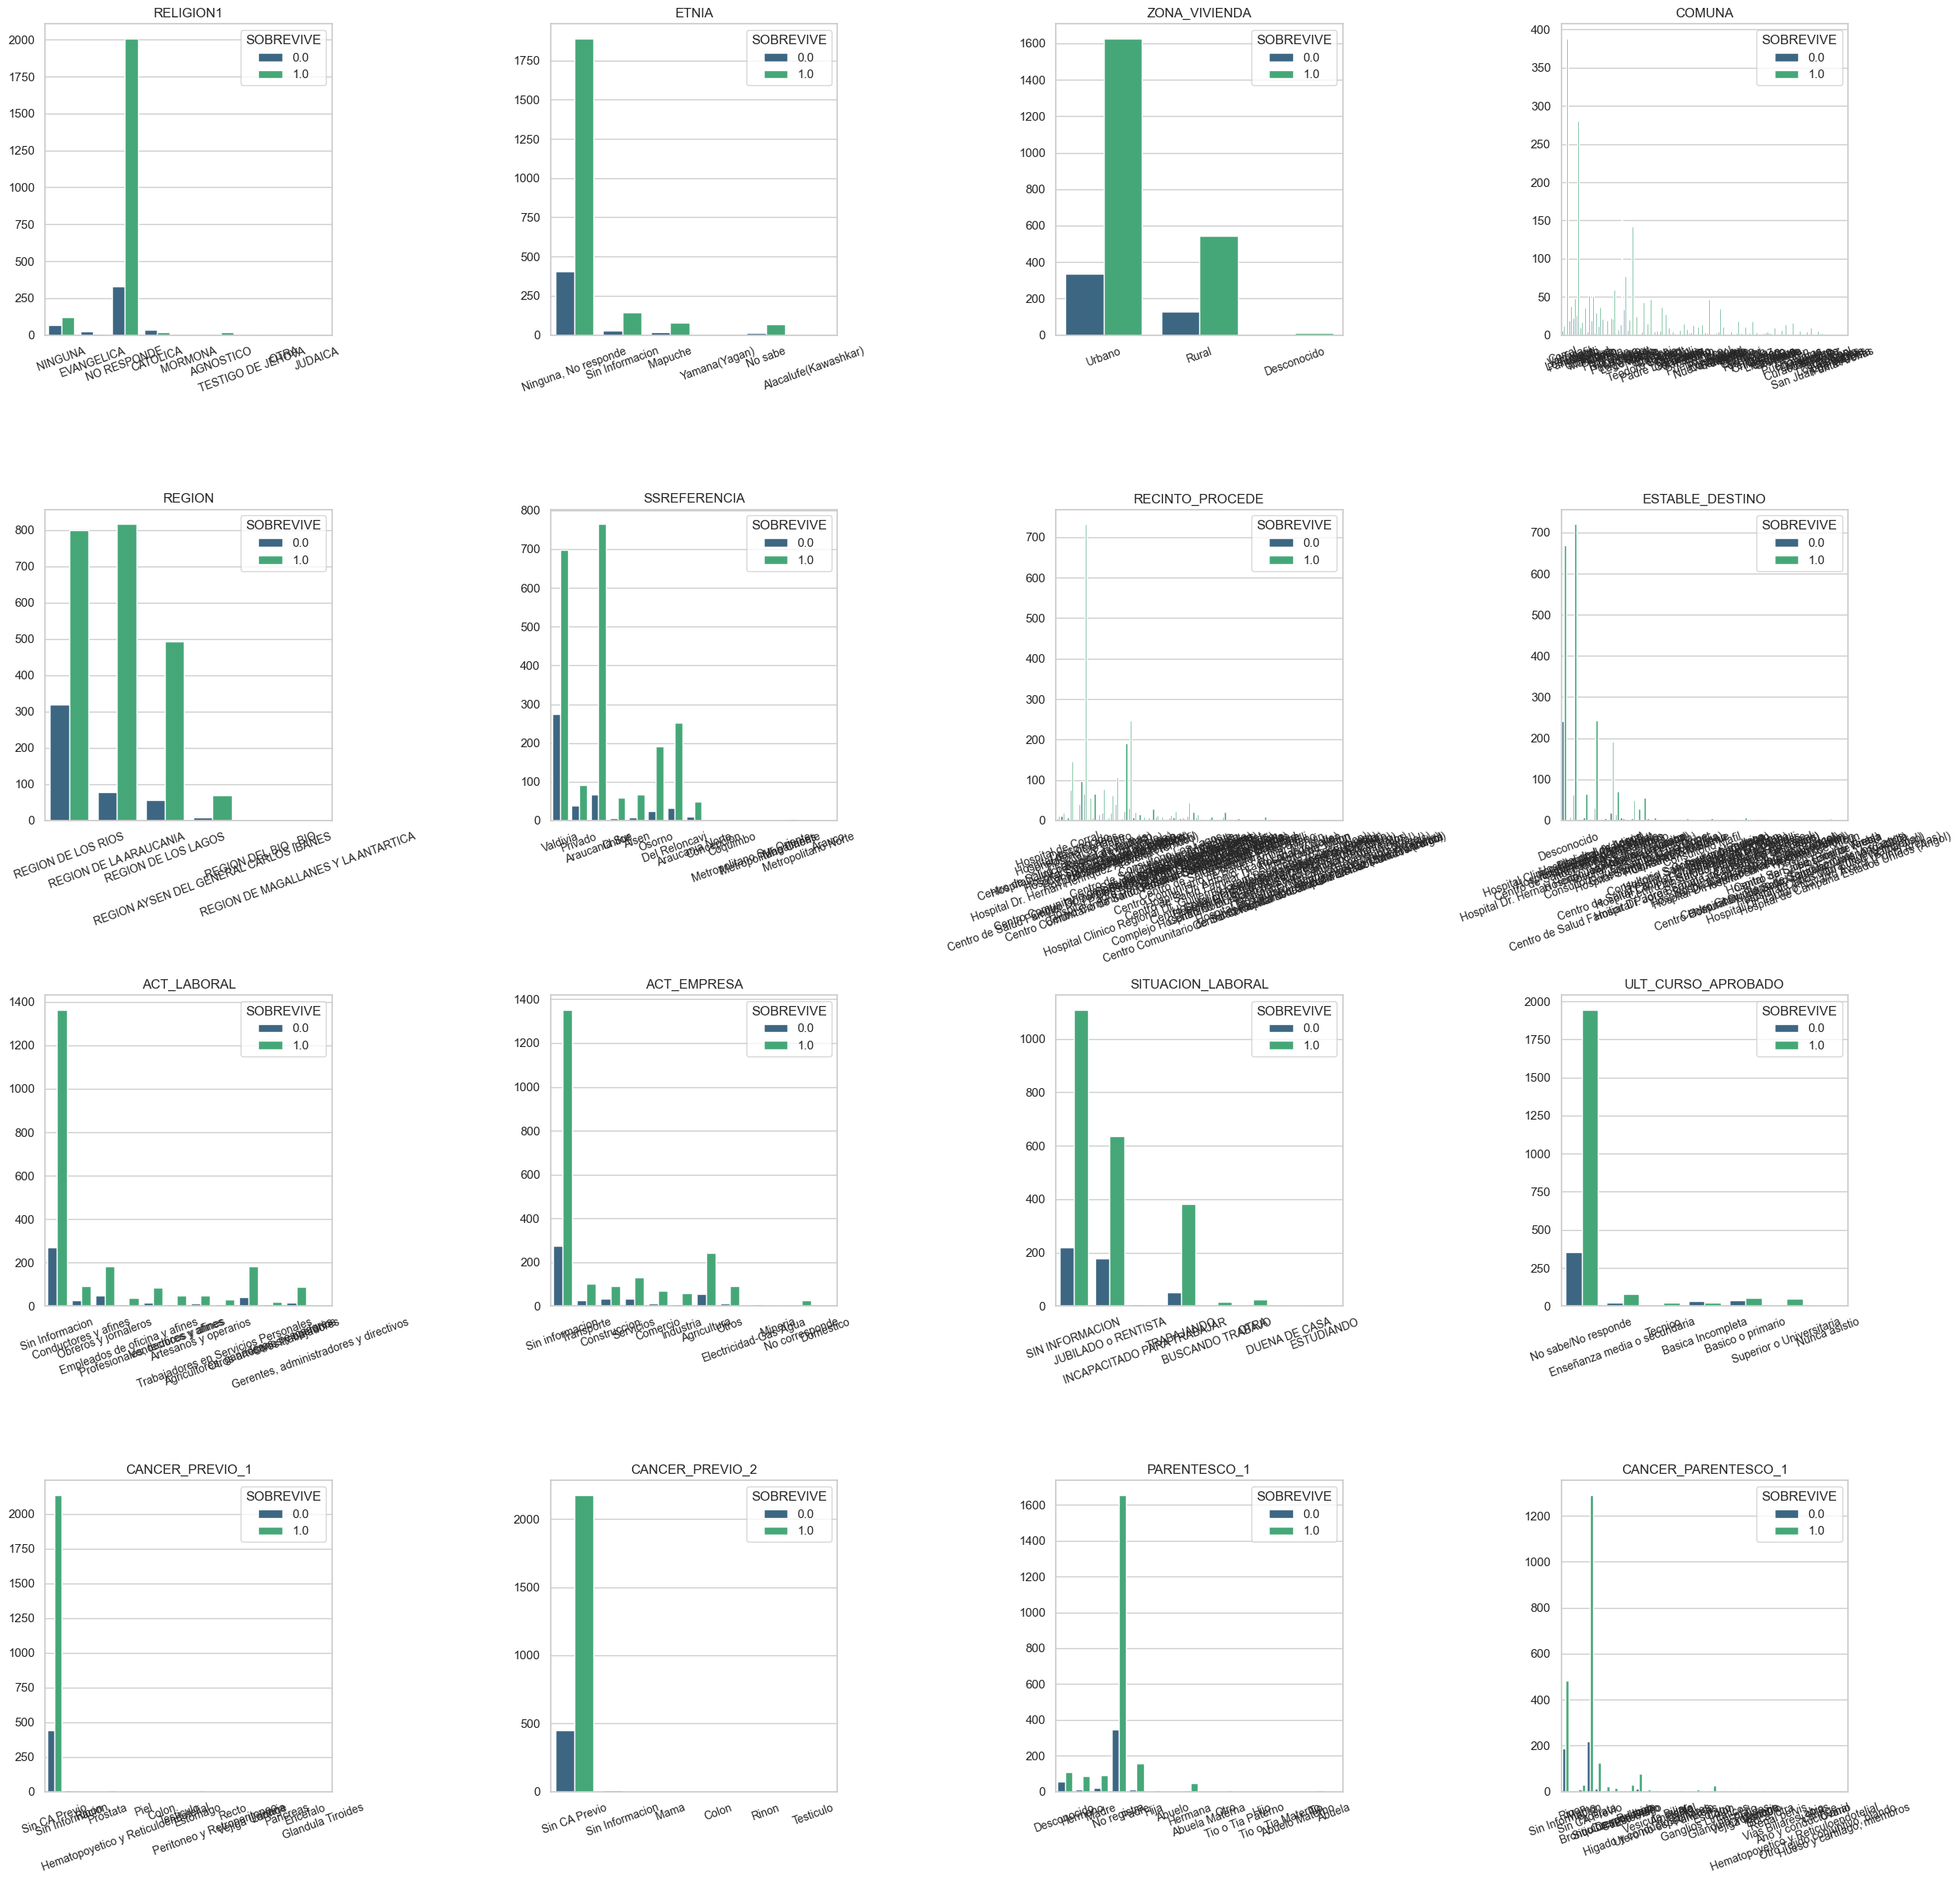

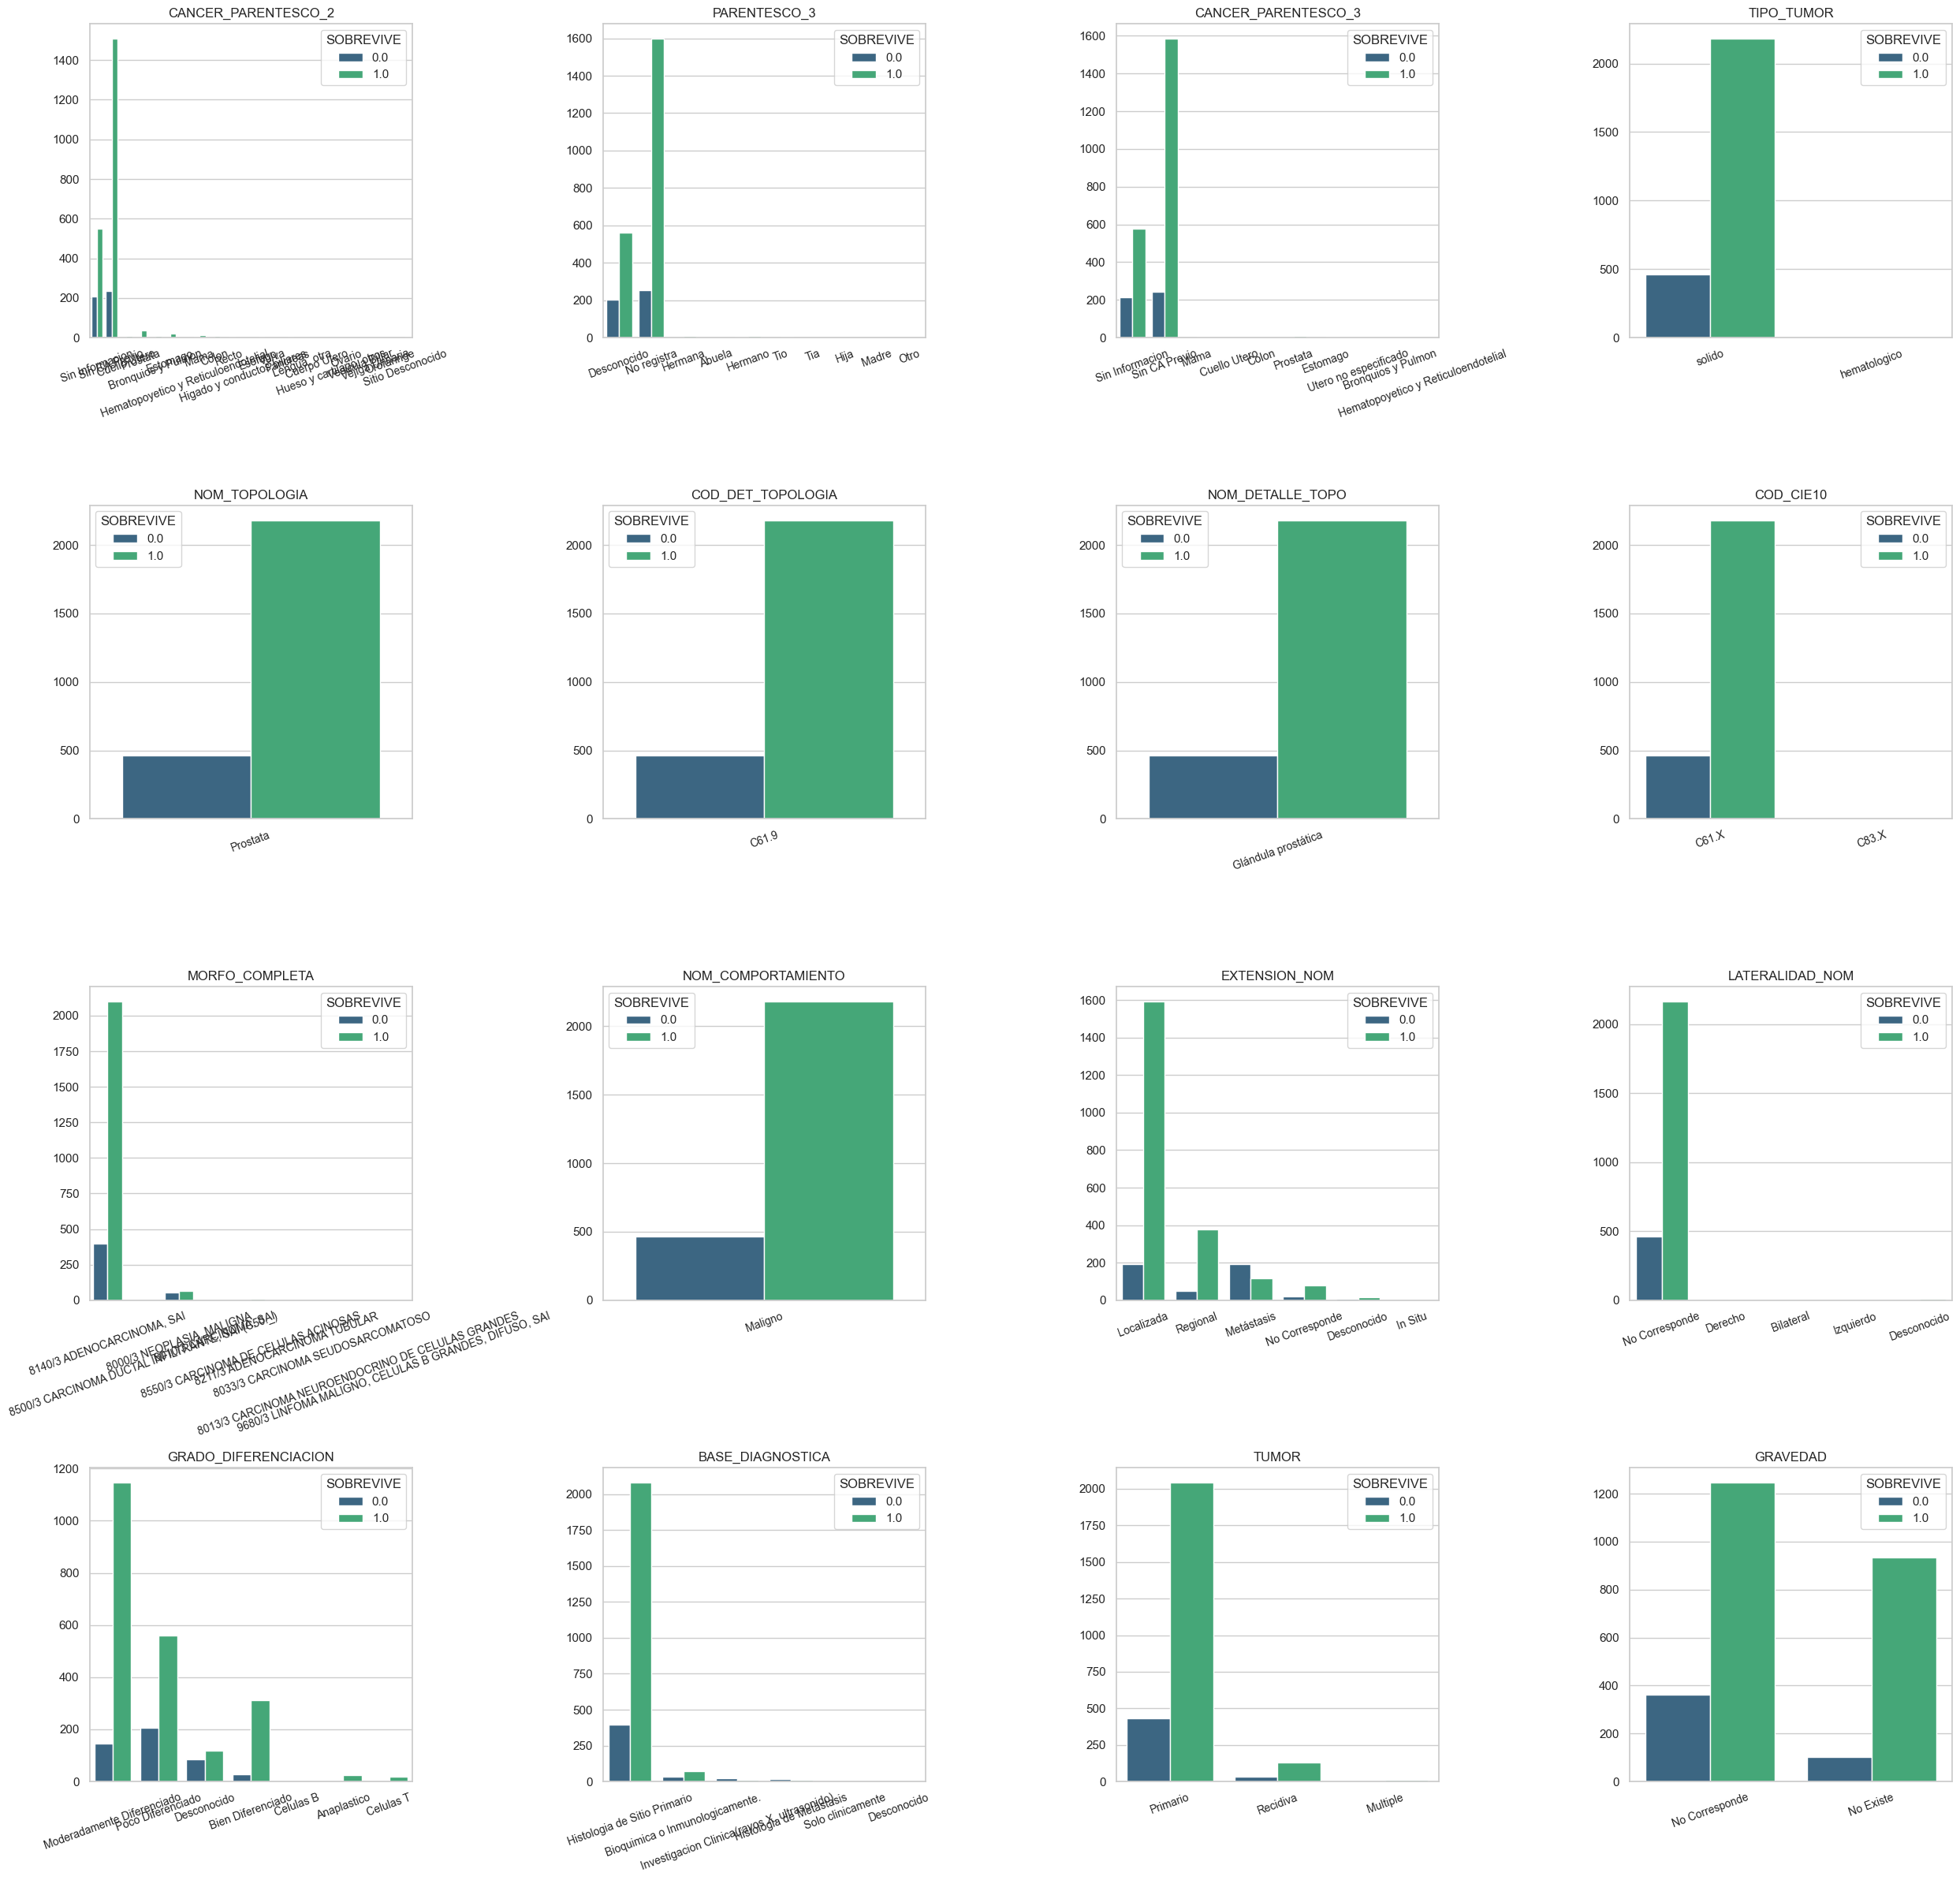

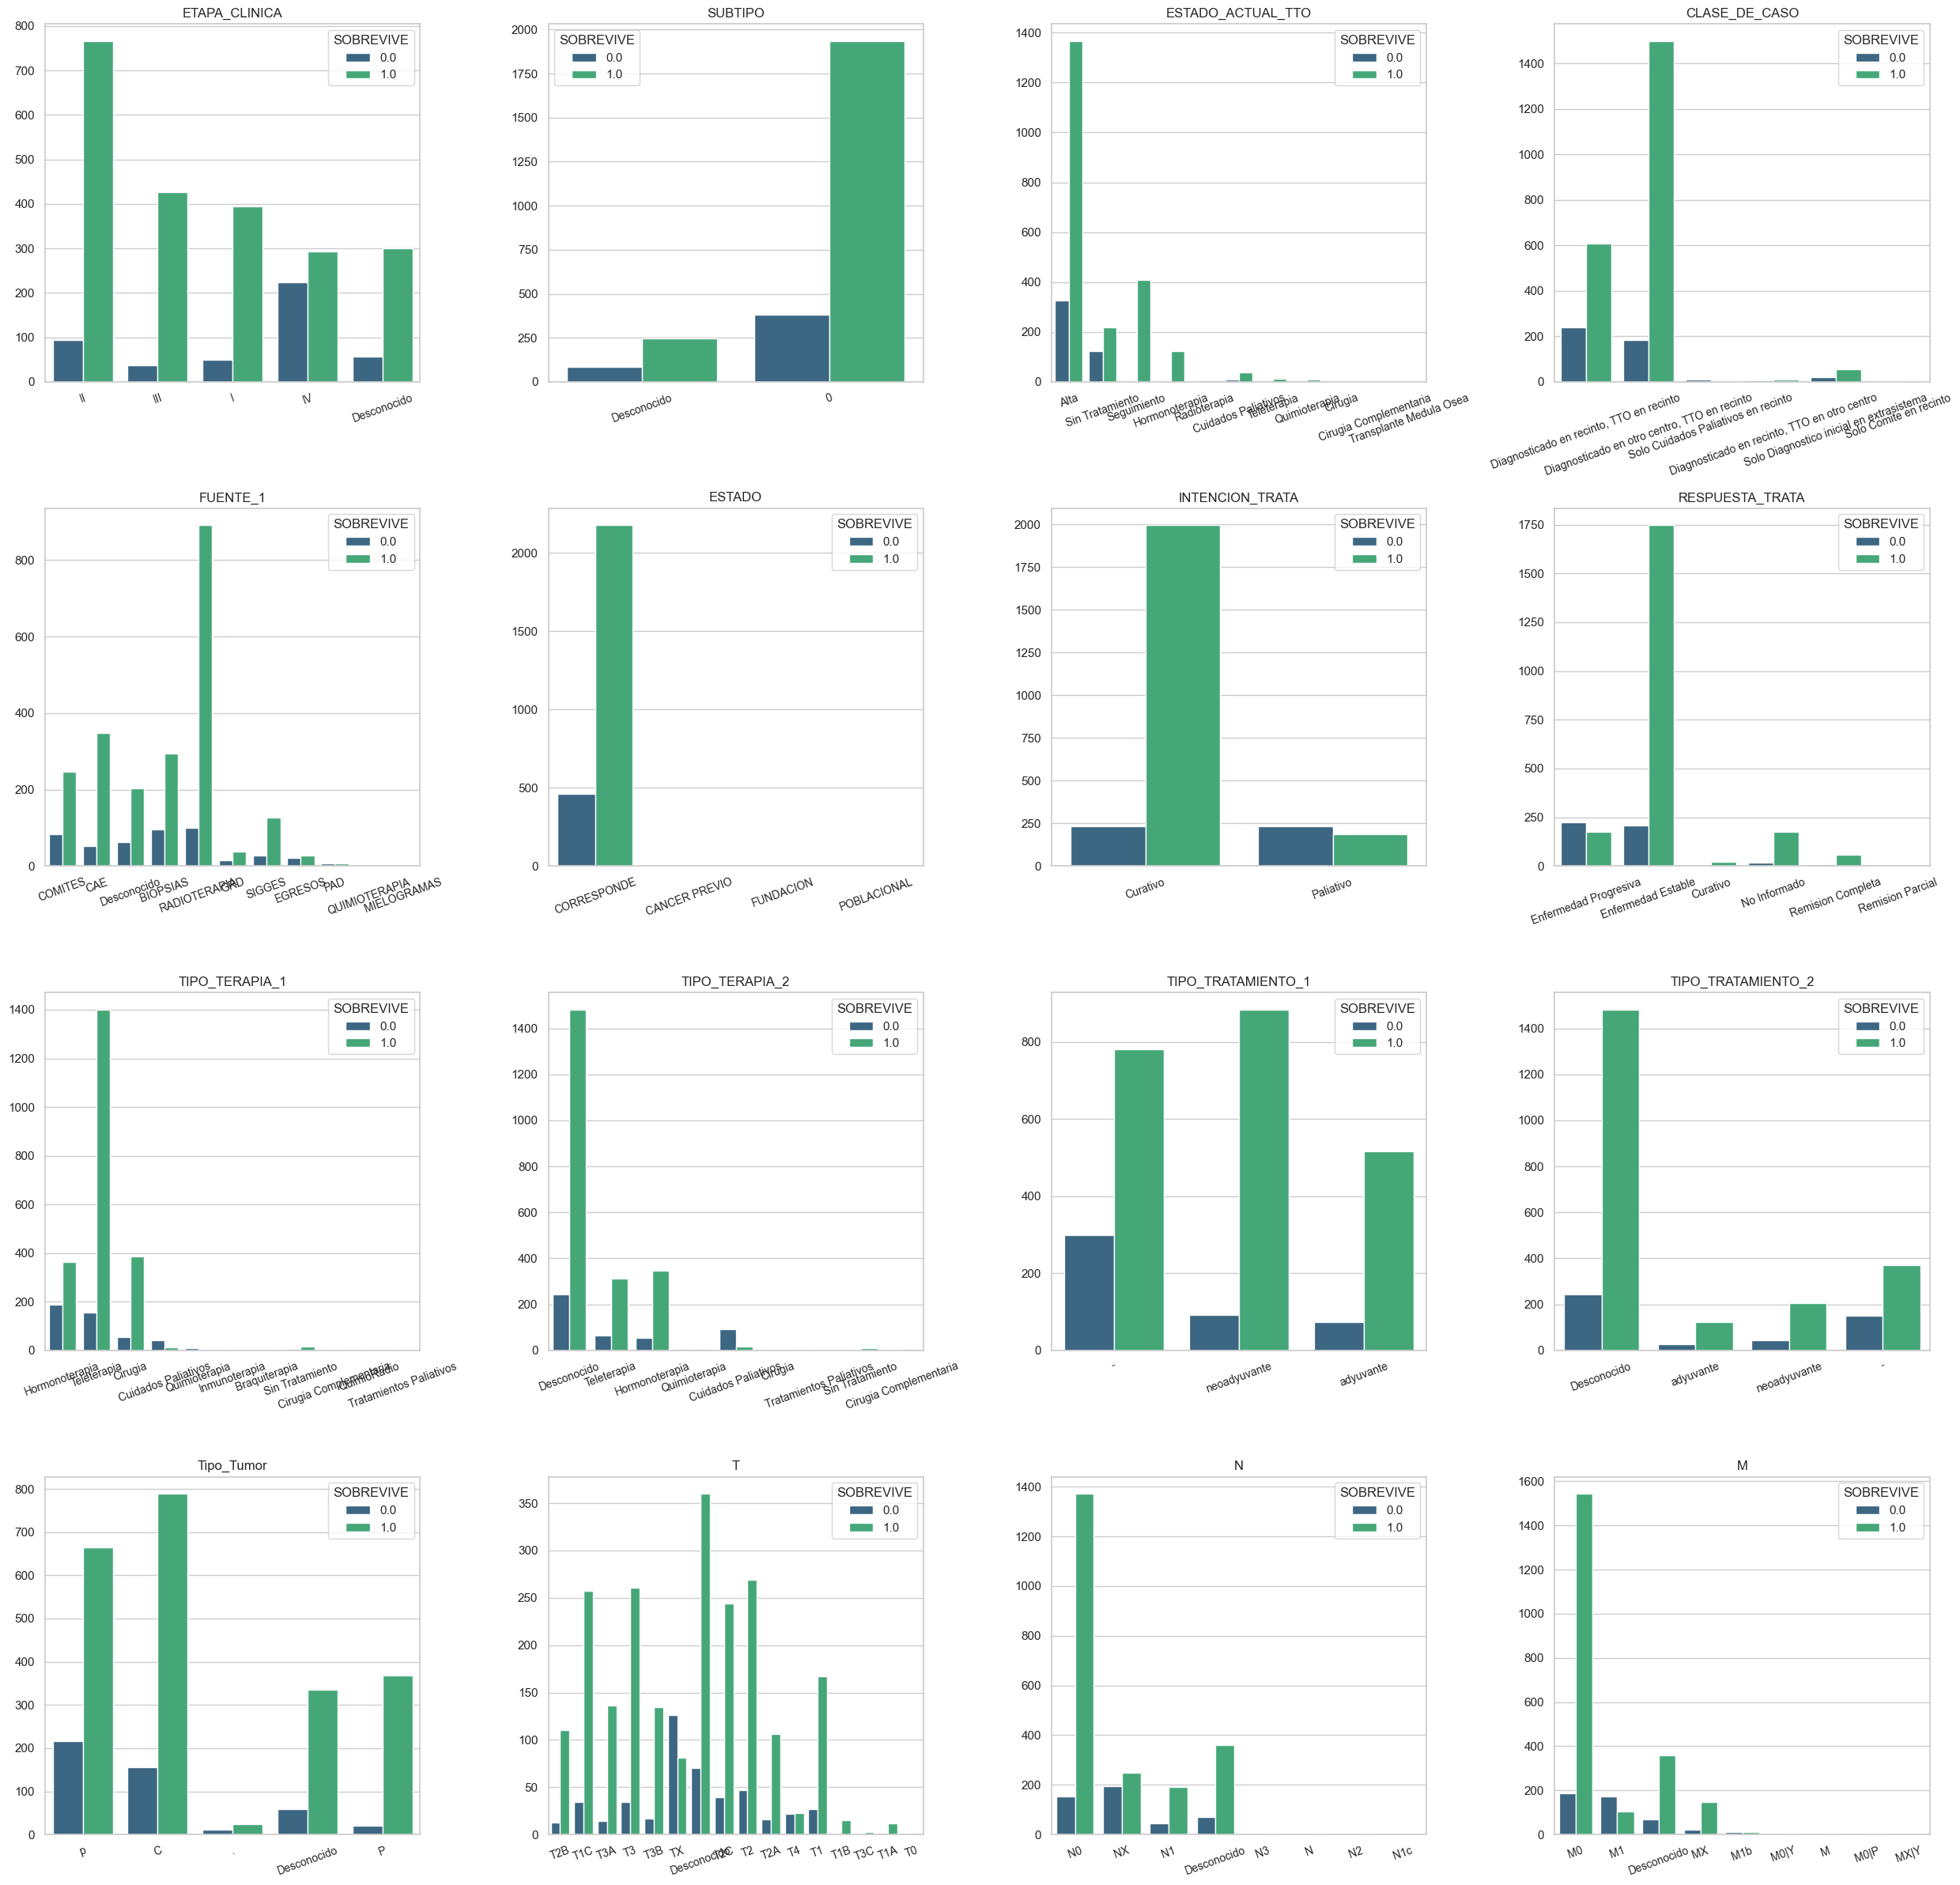

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
# Crear una figura grande para los gráficos
fig = plt.figure(figsize=(25, 25))


# Crear una función para generar gráficos en lotes más pequeños
def plot_categoricals(df, columnas_categoricas, start_index, end_index):
    subset = columnas_categoricas[start_index:end_index]
    num_filas = (len(subset) // 4) + (1 if len(subset) % 4 != 0 else 0)
    fig = plt.figure(figsize=(25, num_filas * 6))
    
    i = 1
    for columna in subset:
        plt.subplot(num_filas, 4, i)
        ax = sns.countplot(data=df, x=columna, hue='SOBREVIVE', palette="viridis")
        ax.set(xlabel=None, ylabel=None)
        plt.title(str(columna), loc='center')
        plt.xticks(rotation=20, fontsize=10)
        i += 1
    
    plt.tight_layout()
    plt.show()

# Generar gráficos para el primer lote de columnas categóricas
plot_categoricals(df, columnas_categoricas, 0, 16)
plot_categoricals(df, columnas_categoricas, 17, 33)
plot_categoricals(df, columnas_categoricas, 34, 50)


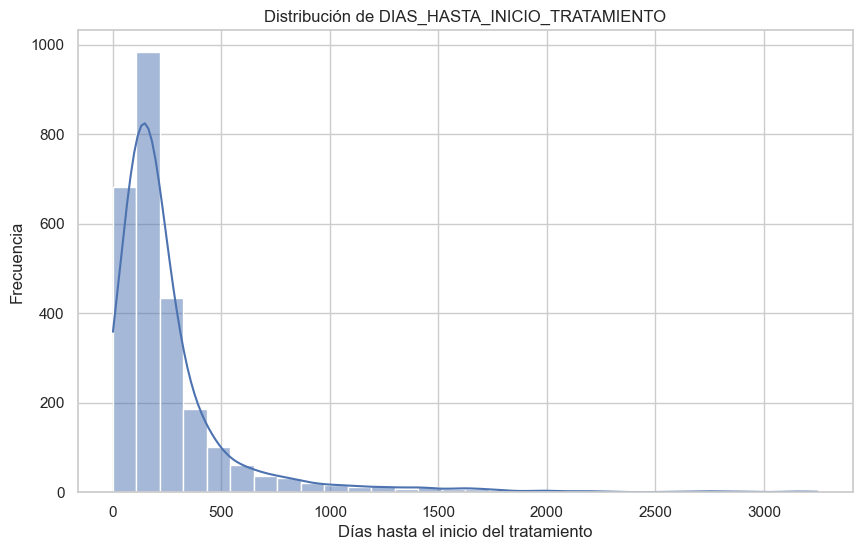

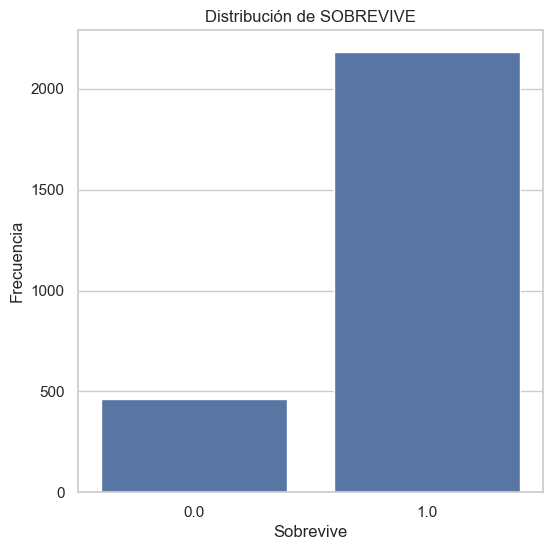

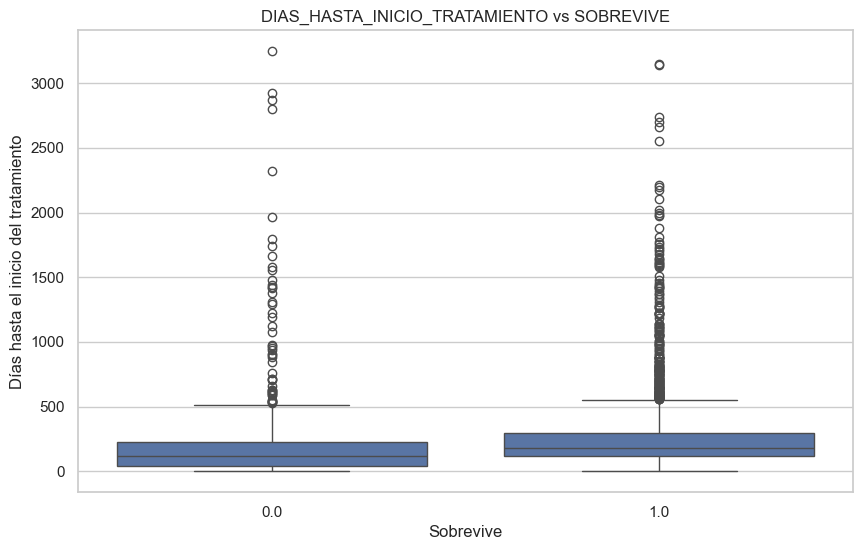

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las visualizaciones
sns.set(style="whitegrid")

# Visualización de la distribución de la variable DIAS_HASTA_INICIO_TRATAMIENTO
plt.figure(figsize=(10, 6))
sns.histplot(df['DIAS_HASTA_INICIO_TRATAMIENTO'], bins=30, kde=True)
plt.title('Distribución de DIAS_HASTA_INICIO_TRATAMIENTO')
plt.xlabel('Días hasta el inicio del tratamiento')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable SOBREVIVE
plt.figure(figsize=(6, 6))
sns.countplot(x='SOBREVIVE', data=df)
plt.title('Distribución de SOBREVIVE')
plt.xlabel('Sobrevive')
plt.ylabel('Frecuencia')
plt.show()


# Relación entre DIAS_HASTA_INICIO_TRATAMIENTO y SOBREVIVE
plt.figure(figsize=(10, 6))
sns.boxplot(x='SOBREVIVE', y='DIAS_HASTA_INICIO_TRATAMIENTO', data=df)
plt.title('DIAS_HASTA_INICIO_TRATAMIENTO vs SOBREVIVE')
plt.xlabel('Sobrevive')
plt.ylabel('Días hasta el inicio del tratamiento')
plt.show()


Análisis de Visualizaciones
Distribución de DIAS_HASTA_INICIO_TRATAMIENTO:

La mayoría de los pacientes inician el tratamiento dentro de los primeros 500 días, con una notable disminución en la frecuencia a medida que los días aumentan.
Hay algunos valores atípicos que muestran un inicio del tratamiento después de los 1000 días.
Distribución de SOBREVIVE:

La mayoría de los pacientes en el dataset han sobrevivido (SOBREVIVE=1), con una proporción significativamente menor que no ha sobrevivido (SOBREVIVE=0).
Distribución de SEXO:

Todos los pacientes en el dataset son de sexo masculino, lo cual es consistente con el enfoque en el cáncer de próstata.
Relación entre DIAS_HASTA_INICIO_TRATAMIENTO y SOBREVIVE:

No parece haber una diferencia significativa en los días hasta el inicio del tratamiento entre los que sobreviven y los que no sobreviven, aunque los que no sobreviven parecen tener un rango ligeramente más amplio y algunos valores atípicos más altos.

Análisis de Supervivencia

Procederemos ahora con el análisis de supervivencia utilizando las curvas de Kaplan-Meier para evaluar cómo diferentes factores afectan la supervivencia de los pacientes.

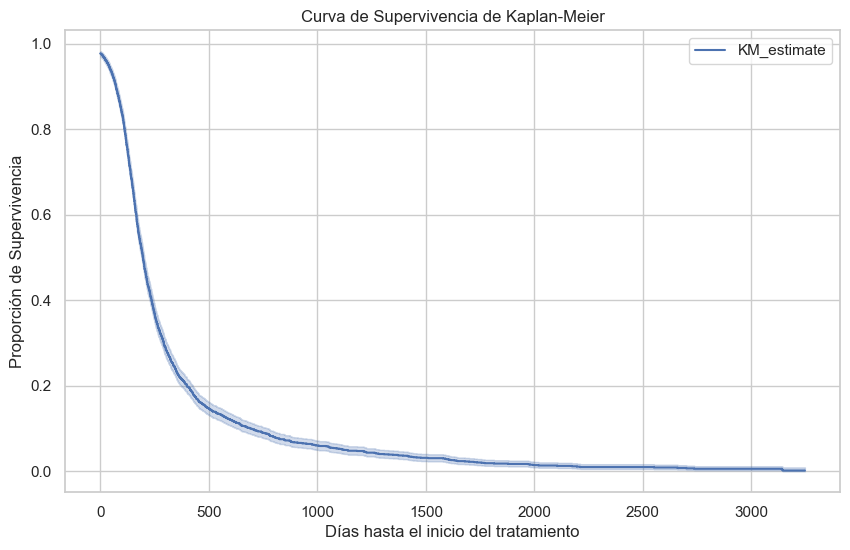

In [167]:
from lifelines import KaplanMeierFitter

# Preparar los datos para el análisis de supervivencia
survival_data = df[['DIAS_HASTA_INICIO_TRATAMIENTO', 'SOBREVIVE']]

# Ajustar la curva de Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data['DIAS_HASTA_INICIO_TRATAMIENTO'], event_observed=survival_data['SOBREVIVE'])

# Visualizar la curva de Kaplan-Meier
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días hasta el inicio del tratamiento')
plt.ylabel('Proporción de Supervivencia')
plt.show()


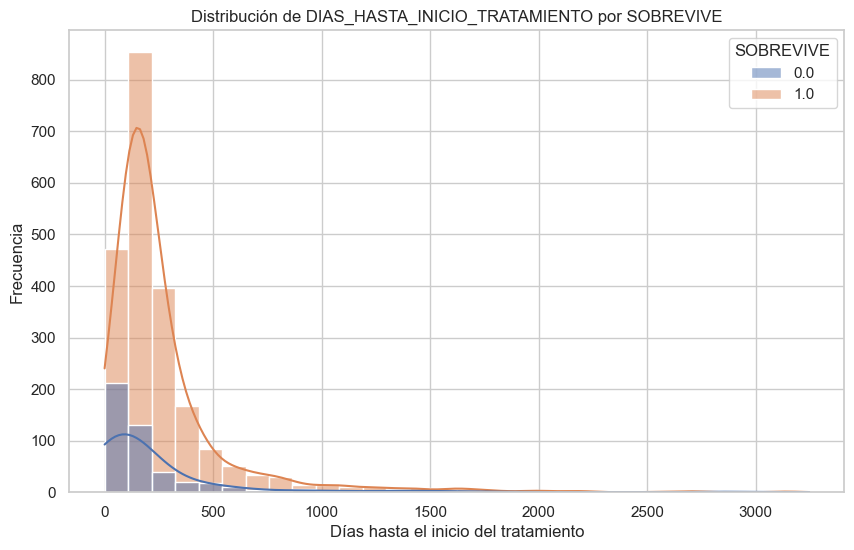

In [168]:

# Histograma de DIAS_HASTA_INICIO_TRATAMIENTO en relación con SOBREVIVE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DIAS_HASTA_INICIO_TRATAMIENTO', hue='SOBREVIVE', bins=30, kde=True)
plt.title('Distribución de DIAS_HASTA_INICIO_TRATAMIENTO por SOBREVIVE')
plt.xlabel('Días hasta el inicio del tratamiento')
plt.ylabel('Frecuencia')
plt.show()


**Análisis de Supervivencia Basado en DIAS_HASTA_INICIO_TRATAMIENTO y SOBREVIVE

1. Boxplot de DIAS_HASTA_INICIO_TRATAMIENTO vs SOBREVIVE:

No parece haber una diferencia significativa en los días hasta el inicio del tratamiento entre los que sobreviven y los que no sobreviven. Sin embargo, hay algunos valores atípicos que se destacan, especialmente en aquellos que no sobreviven.

2. Histograma de DIAS_HASTA_INICIO_TRATAMIENTO por SOBREVIVE:

La mayoría de los pacientes que sobreviven comienzan su tratamiento dentro de los primeros 500 días.
Para los que no sobreviven, la distribución también es similar, pero hay algunos casos con un inicio de tratamiento mucho más tardío.

In [169]:
# Seleccionar las columnas categóricas y la variable objetivo
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
target_column = 'SOBREVIVE'  

In [170]:
from scipy.stats import chi2_contingency

# Función para calcular chi-cuadrado, p-valor y coeficiente de Cramér
def chi2_test(data, column, target):
    contingency_table = pd.crosstab(data[column], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = sum(contingency_table.sum())
    phi2 = chi2/n
    r, k = contingency_table.shape
    cramers_v = (phi2 / min(k-1, r-1))**0.5 if min(k-1, r-1) > 0 else 0
    return chi2, p, cramers_v

# Calcular chi-cuadrado, p-valor y coeficiente de Cramér para cada columna categórica
results = {}
for col in categorical_columns:
    try:
        chi2, p, cramers_v = chi2_test(df, col, target_column)
        results[col] = {'chi2': chi2, 'p-value': p, 'cramer': cramers_v}
    except ValueError:  # Ignorar columnas que no tienen suficientes datos para la prueba
        continue

# Convertir los resultados a un DataFrame para mejor visualización
results_df = pd.DataFrame(results).T
results_df.sort_values(by="cramer", ascending=False)


,chi2,p-value,cramer
EXTENSION_NOM,503.676998,1.283987e-106,0.436461
RESPUESTA_TRATA,496.115387,5.504639e-105,0.433172
INTENCION_TRATA,488.798055,2.602210e-108,0.429966
M,460.338149,2.251664e-94,0.417261
TIPO_TERAPIA_2,376.725507,1.773636e-76,0.377469
TIPO_TERAPIA_1,370.291345,1.956737e-73,0.374232
ESTABLE_DESTINO,342.198395,6.515033e-44,0.359756
T,339.646530,3.064691e-63,0.358412
ETAPA_CLINICA,305.113796,8.543784e-65,0.339704
N,273.398791,2.870805e-55,0.321564


In [171]:
# Filtrar los resultados por valores de Cramér's V mayores a 0.1
filtered_results_df = results_df.query("`cramer` < 0.1")

filtered_results_df.sort_values(by="cramer", ascending=False)

filtered_results_df.index.tolist()


['ETNIA',
 'ZONA_VIVIENDA',
 'ACT_LABORAL',
 'ACT_EMPRESA',
 'TIPO_TUMOR',
 'NOM_TOPOLOGIA',
 'COD_DET_TOPOLOGIA',
 'NOM_DETALLE_TOPO',
 'COD_CIE10',
 'NOM_COMPORTAMIENTO',
 'LATERALIDAD_NOM',
 'TUMOR',
 'SUBTIPO',
 'ESTADO']

In [172]:
#  Eliminar las columnas especificadas
df = df.drop(columns=filtered_results_df.index.tolist(), errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RELIGION1                            2644 non-null   object 
 1   COMUNA                               2644 non-null   object 
 2   REGION                               2644 non-null   object 
 3   SSREFERENCIA                         2644 non-null   object 
 4   RECINTO_PROCEDE                      2644 non-null   object 
 5   ESTABLE_DESTINO                      2644 non-null   object 
 6   SITUACION_LABORAL                    2644 non-null   object 
 7   ULT_CURSO_APROBADO                   2644 non-null   object 
 8   CANCER_PREVIO_1                      2644 non-null   object 
 9   CANCER_PREVIO_2                      2644 non-null   object 
 10  PARENTESCO_1                         2644 non-null   object 
 11  CANCER_PARENTESCO_1           

### Definir caracteristicas más importantes utilizando RandomForest

Accuracy: 0.89
Top 20 Feature ranking:
1. feature EXTENSION_NOM_Metástasis (0.03626340856730595)
2. feature INTENCION_TRATA_Paliativo (0.03550542762657512)
3. feature RESPUESTA_TRATA_Enfermedad Progresiva (0.03312180910693563)
4. feature M_M1 (0.021934641583499406)
5. feature TIPO_TERAPIA_2_Cuidados Paliativos (0.02066511525712157)
6. feature ESTADO_ACTUAL_TTO_Sin Tratamiento (0.019094250063304605)
7. feature RESPUESTA_TRATA_Enfermedad Estable (0.01854796037765732)
8. feature T_TX (0.015894994811122568)
9. feature GRADO_DIFERENCIACION_Poco Diferenciado (0.014902854602497897)
10. feature ETAPA_CLINICA_IV (0.014453666527889781)
11. feature TIPO_TERAPIA_1_Hormonoterapia (0.01294973857111513)
12. feature ESTADO_ACTUAL_TTO_Seguimiento (0.012547765186437914)
13. feature RELIGION1_NO RESPONDE (0.012242311973591692)
14. feature GRADO_DIFERENCIACION_Moderadamente Diferenciado (0.011825583422221788)
15. feature EXTENSION_NOM_Localizada (0.011374037589202673)
16. feature M_M0 (0.01108387700331831

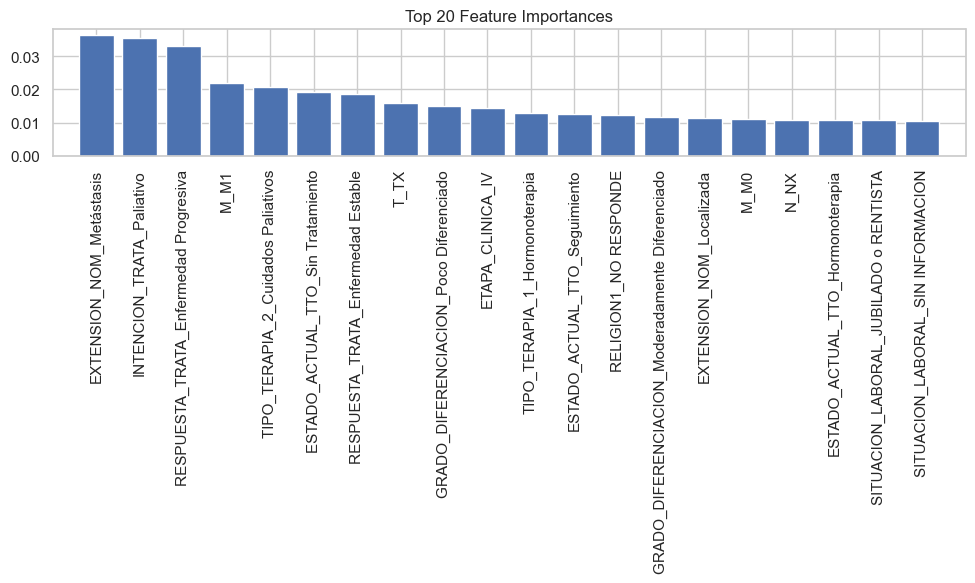

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


# Seleccionar las columnas relevantes
# Identificar columnas categóricas
columns_to_use = df.select_dtypes(include=['object']).columns.to_list()
columns_to_use.append('SOBREVIVE')
columns_to_use.append('DIAS_DESDE_NACIMIENTO_A_DIAGNO')
df_rf = df[columns_to_use]

# Convertir la variable de supervivencia en binaria para clasificación
df_rf = df_rf.copy()  # Asegurarse de trabajar con una copia explícita del DataFrame
df_rf.loc[:, 'event'] = (df_rf['SOBREVIVE'] == 1).astype(int)

# Convertir variables categóricas a variables dummy
df_rf = pd.get_dummies(df_rf, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_rf.drop(columns=['DIAS_DESDE_NACIMIENTO_A_DIAGNO', 'SOBREVIVE', 'event'])
y = df_rf['event']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Obtener la importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Filtrar las 20 características más importantes
top_20_indices = indices[:20]
top_20_importances = importances[top_20_indices]
top_20_features = X.columns[top_20_indices]

# Imprimir la importancia de las 20 características más importantes
print("Top 20 Feature ranking:")

for f in range(20):
    print(f"{f + 1}. feature {top_20_features[f]} ({top_20_importances[f]})")

# Visualizar la importancia de las 20 características más importantes
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), top_20_importances, align="center")
plt.xticks(range(20), top_20_features, rotation=90)
plt.xlim([-1, 20])
plt.tight_layout()
plt.show()


In [174]:
df.to_csv('../data/processed/df_pre-encoded.csv', index=False, encoding='utf-8')